Let's define some conventions and physical equations of the De Saint Venaint theory on beams.

The convention we are gonna use for the signs consists in:

1. the displacement $u$ axis is positive pointing downwards
2. the rotation of the section $ \varphi $ is positive if counter-clockwise
3. the sheer force $T$ is positive if clockwise
4. the momentum $M$ is positive if it stretches the bottom part of the beam

We can then introduce two equations that revolve around the approximate linearity of the deformations in the DSV theory:

$$
    
$$

In [34]:
using Plots
using DifferentialEquations

Poisson with M, E and J as functions of x

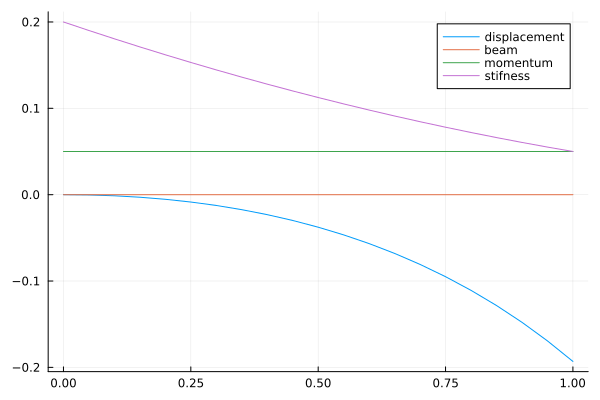

In [35]:
E(x)= 2-x                #young module equation
J(x)= 2-x                     #inertia equation
M(x)=-1;                  #momentum equation

EJ(x)= E(x)*J(x)

f(x)=-M(x)/(EJ(x))


function poisson!(du,u,p,x)
    du[1]=u[2]
    du[2]=f(x)
end


function bc!(r,u,p,x)
    r[1]= u[1][1] - 0
    r[2]= u[1][2] - 0
end


xspan=(0.0 , 1.0)

bvp= BVProblem(poisson!,bc!,[0.,0.],xspan)

u_sol= solve(bvp,MIRK4(), dt = 0.05)

plot(u_sol.t,-u_sol[1,:],label="displacement")
plot!(u_sol.t,0*u_sol.t,label="beam")
plot!(u_sol.t,-0.05*M.(u_sol.t),label="momentum")

plot!(u_sol.t,0.05*(EJ.(u_sol.t)),label="stifness")

beam equation with E and J constant and q as a function of x

between two joints

Boundary conditions:

$$ \begin{cases}

    \dfrac{d^2u}{dx^2} (x=0) = 0    \\ \\
    u(x=0) = 0 \\ \\

    \dfrac{d^2u}{dx^2} (x=l) = 0    \\ \\
    u(x=l) = 0 \\

\end{cases}$$

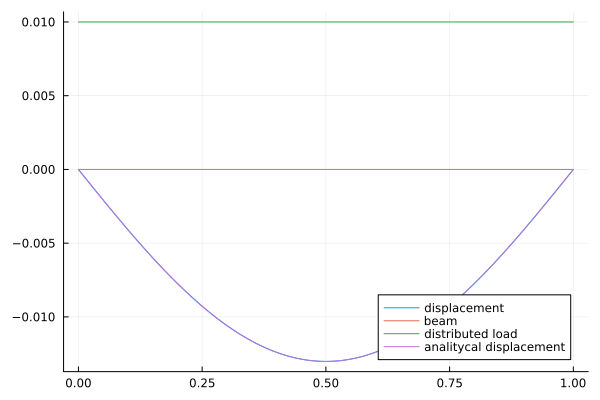

In [36]:
q(x)=1
EJ(x)=1

f(x)=q(x)/EJ(x)


function beam!(du,u,p,x)
    du[1]=u[2]
    du[2]=u[3]
    du[3]=u[4]
    du[4]=f(x)
end


function bc!(residual,u,p,x)
    residual[1]= u[1][1]
    residual[2]= u[end][1]
    residual[3]= u[1][3] 
    residual[4]= u[end][3] 
end

xspan=(0.0 , 1.0)

bvp= BVProblem(beam!,bc!,[0.,0.,0.,0.],xspan)

u_sol= solve(bvp,MIRK4(),dt = 0.01)


plot(u_sol.t,-u_sol[1,:],label="displacement")
plot!(u_sol.t,0*u_sol.t,label="beam")
plot!(u_sol.t,0.01*f.(u_sol.t),label="distributed load")

fex(x)=(x^4/24 -x^3/12 +x/24)*f(x)
plot!(u_sol.t,-fex.(u_sol.t),label="analitycal displacement")

case with fixed joint in one end

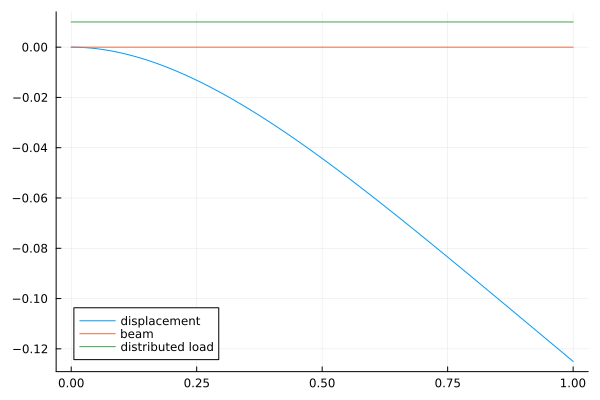

In [37]:
q(x)=1
EJ(x)=1

f(x)=q(x)/EJ(x)


function beam!(du,u,p,x)
    du[1]=u[2]
    du[2]=u[3]
    du[3]=u[4]
    du[4]=f(x)
end


function bc!(residual,u,p,x)
    residual[1]= u[1][1]
    residual[2]= u[end][3]
    residual[3]= u[1][2] 
    residual[4]= u[end][4] 
end

xspan=(0.0 , 1.0)

bvp= BVProblem(beam!,bc!,[0.,0.,0.,0.],xspan)

u_sol= solve(bvp,MIRK4(),dt = 0.01)


plot(u_sol.t,-u_sol[1,:],label="displacement")
plot!(u_sol.t,0*u_sol.t,label="beam")
plot!(u_sol.t,0.01*f.(u_sol.t),label="distributed load")

between fixed constrain and joint 

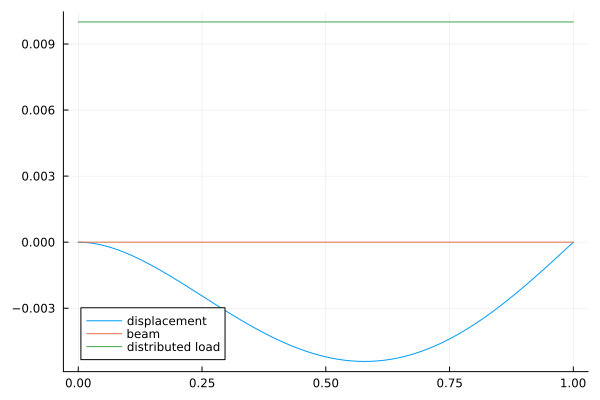

In [38]:
q(x)=1
EJ(x)=1

f(x)=q(x)/EJ(x)


function beam!(du,u,p,x)
    du[1]=u[2]
    du[2]=u[3]
    du[3]=u[4]
    du[4]=f(x)
end


function bc!(residual,u,p,x)
    residual[1]= u[1][1]
    residual[2]= u[1][2]
    residual[3]= u[end][1] 
    residual[4]= u[end][3] 
end

xspan=(0.0 , 1.0)

bvp= BVProblem(beam!,bc!,[0.,0.,0.,0.],xspan)

u_sol= solve(bvp,MIRK4(),dt = 0.01)


plot(u_sol.t,-u_sol[1,:],label="displacement")
plot!(u_sol.t,0*u_sol.t,label="beam")
plot!(u_sol.t,0.01*f.(u_sol.t),label="distributed load")

between fixed costrain and pattino

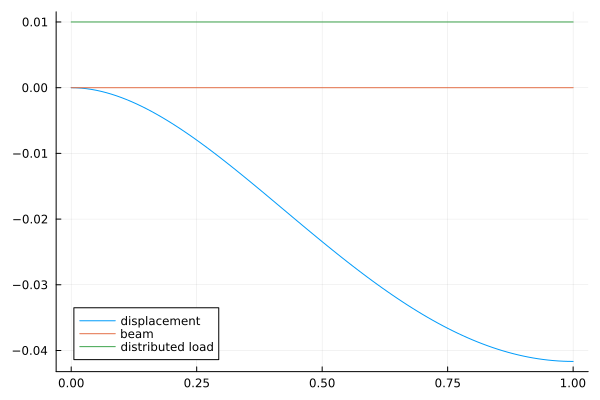

In [39]:
q(x)=1
EJ(x)=1

f(x)=q(x)/EJ(x)


function beam!(du,u,p,x)
    du[1]=u[2]
    du[2]=u[3]
    du[3]=u[4]
    du[4]=f(x)
end


function bc!(residual,u,p,x)
    residual[1]= u[1][1]
    residual[2]= u[1][2]
    residual[3]= u[end][2] 
    residual[4]= u[end][4] 
end

xspan=(0.0 , 1.0)

bvp= BVProblem(beam!,bc!,[0.,0.,0.,0.],xspan)

u_sol= solve(bvp,MIRK4(),dt = 0.01)


plot(u_sol.t,-u_sol[1,:],label="displacement")
plot!(u_sol.t,0*u_sol.t,label="beam")
plot!(u_sol.t,0.01*f.(u_sol.t),label="distributed load")

between two fixed joints

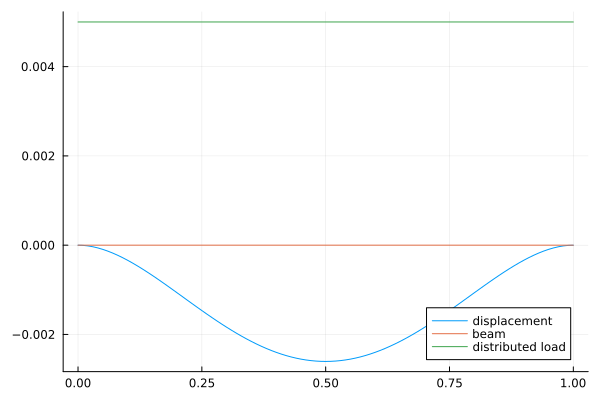

In [40]:
q(x)=1
EJ(x)=1

f(x)=q(x)/EJ(x)


function beam!(du,u,p,x)
    du[1]=u[2]
    du[2]=u[3]
    du[3]=u[4]
    du[4]=f(x)
end


function bc!(residual,u,p,x)
    residual[1]= u[1][1]
    residual[2]= u[1][2]
    residual[3]= u[end][1] 
    residual[4]= u[end][2] 
end

xspan=(0.0 , 1.0)

bvp= BVProblem(beam!,bc!,[0.,0.,0.,0.],xspan)

u_sol= solve(bvp,MIRK4(),dt = 0.01)


plot(u_sol.t,-u_sol[1,:],label="displacement")
plot!(u_sol.t,0*u_sol.t,label="beam")
plot!(u_sol.t,0.005*f.(u_sol.t),label="distributed load")

let's try using a gaussian distribution for the load

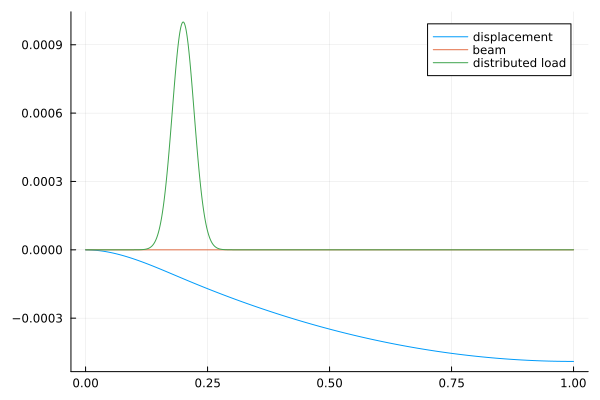

In [69]:
A=1
x0=0.2
sigma=0.001

q(x)=A*(exp(-(x-x0)^2/sigma))

E(x)= 1               #young module equation (HAS TO BE CONSTANT)
J(x)= 1                     #inertia equation (HAS TO BE CONSTANT)
EJ(x)= E(x)*J(x)        #stiffness (HAS TO BE CONSTANT)


f(x)=q(x)/EJ(x)


function beam!(du,u,p,x)
    du[1]=u[2]
    du[2]=u[3]
    du[3]=u[4]
    du[4]=f(x)
end


function bc!(residual,u,p,x)
    residual[1]= u[1][1]
    residual[2]= u[1][2]
    residual[3]= u[end][2] 
    residual[4]= u[end][4] 
end

xspan=(0.0 , 1.0)

bvp= BVProblem(beam!,bc!,[0.,0.,0.,0.],xspan)

u_sol= solve(bvp,MIRK4(),dt = 0.001)


plot(u_sol.t,-u_sol[1,:],label="displacement")
plot!(u_sol.t,0*u_sol.t,label="beam")
plot!(u_sol.t,0.001*q.(u_sol.t),label="distributed load")

We can now try to vary E an J by implementing the variation on E and J along x. 

We have to consider a new beam equation that now accounts for these changes starting from the Poisson equation, which isn't influenced by those variations:

$$

u''\cdot E(x)J(x) = -M(x) 

\quad \rightarrow \quad

\left( u''\cdot E(x)J(x) \right)'= \left( -M(x)\right)' = -T(x)

\quad \rightarrow \quad

\left( u''\cdot E(x)J(x) \right)''= \left( -T(x)\right)' = q(x)

$$

In this way e get a new form of the beam equation that accounts for the variability of the stiffness:

$$ \dfrac{d^2}{dx^2} \left[ \dfrac{d^2u}{dx^2} \cdot E(x)J(x) \right] = q(x) $$

So now to solve the differential equation we can divide it in two differential equations and solve the system:

$$

\begin{cases}
    u'' \cdot E(x) J(x) =v \\
    v''=q(x)
\end{cases}

\qquad \Rightarrow \qquad

\begin{cases}
    u' = u_2 \\
    u'' =v / E(x) J(x)\\
    v'=u_4 \\
    v''=q(x)
\end{cases}

\qquad \Rightarrow \qquad

\underline{du} =
\begin{bmatrix}
   u' \\
   u'' \\
   v' \\
   v'' \\
\end{bmatrix}

\quad

\underline{u} =
\begin{bmatrix}
   u_1 = u = u(x)      \\
   u_2 = u' = -\varphi (x) \\
   u_3 = v = -M(x)     \\
   u_4 = v' = -T(x)    \\
\end{bmatrix}

$$

We can now impose the boundary conditions on the components of the $ \underline{u}$ vector according to the constrains

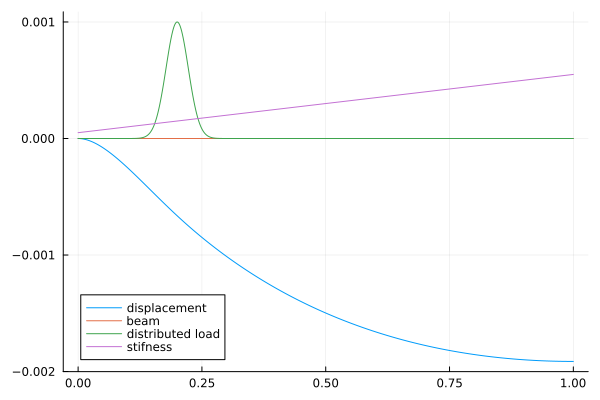

In [77]:
A=1
x0=0.2
sigma=0.001

q(x)=A*(exp(-(x-x0)^2/sigma))

E(x)= 1           #young module equation
J(x)= x +0.1                     #inertia equation
EJ(x)= E(x)*J(x)        #stiffness

f(x)=q(x)


function beam!(du,u,p,x)
    du[1]=u[2]
    du[2]=u[3]/EJ(x)
    du[3]=u[4]
    du[4]=f(x)
end


function bc!(residual,u,p,x)
    residual[1]= u[1][1]
    residual[2]= u[1][2]
    residual[3]= u[end][2] 
    residual[4]= u[end][4] 
end

xspan=(0.0 , 1.0)

bvp= BVProblem(beam!,bc!,[0.,0.,0.,0.],xspan)

u_sol= solve(bvp,MIRK4(),dt = 0.001)




plot(u_sol.t,-u_sol[1,:],label="displacement")
plot!(u_sol.t,0*u_sol.t,label="beam")
plot!(u_sol.t,0.001*q.(u_sol.t),label="distributed load")
plot!(u_sol.t,0.0005*(EJ.(u_sol.t)),label="stifness")